/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:57:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:57:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:57:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:57:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:57:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

 성능 요약
           Model  Accuracy  Recall  F1 Score  ROC AUC
0  Random Forest    0.9481  0.8909    0.9180   0.9383
1        XGBoost    0.9410  0.8909    0.9083   0.9358
2            MLP    0.9481  0.8909    0.9180   0.9358


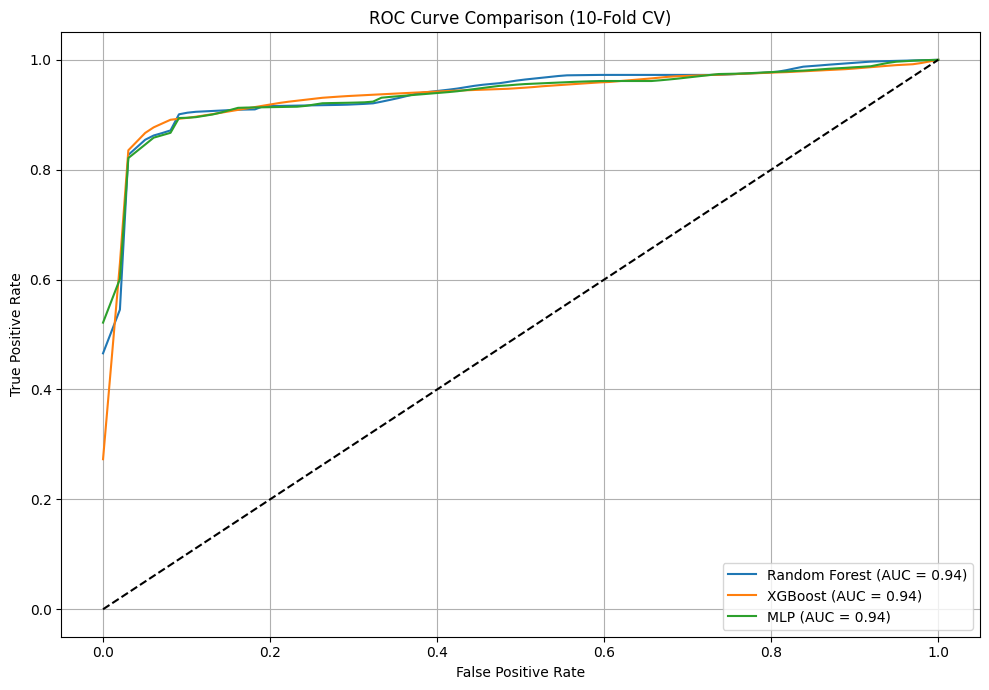

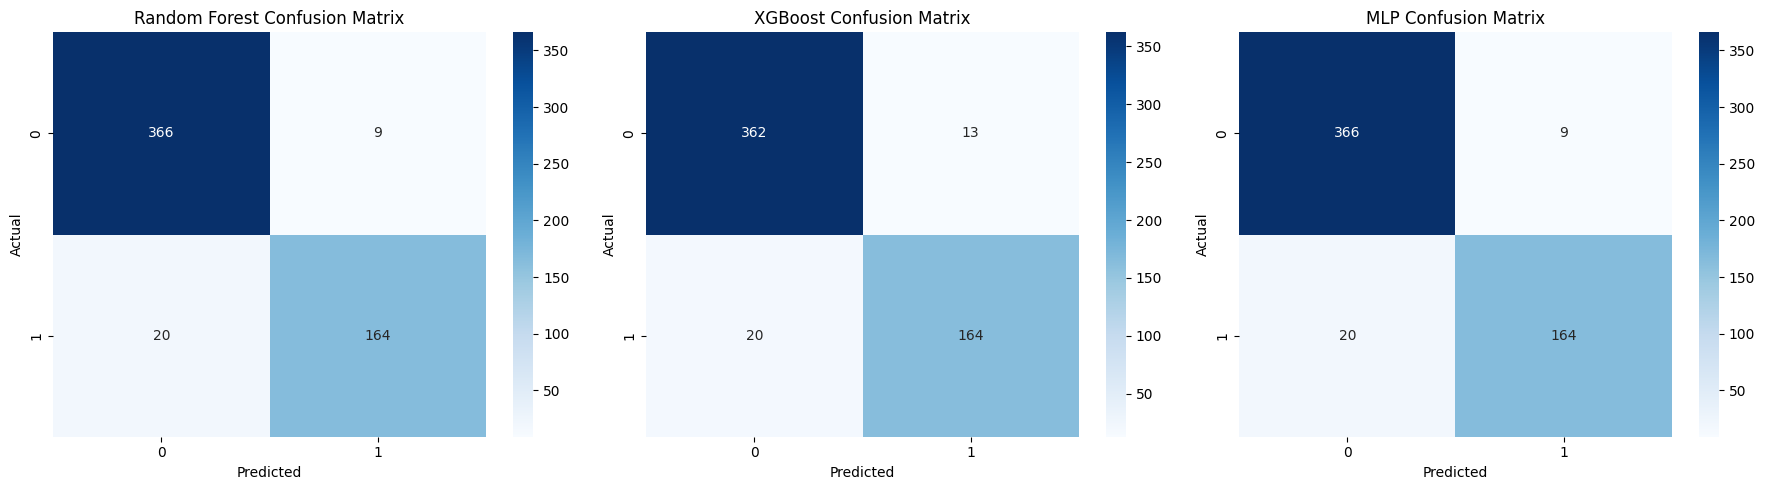

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# 데이터 불러오기
df = pd.read_csv("/content/sample_data/final_data.csv")
X = df.drop(columns=["Person ID", "Sleep Disorder"])
y = df["Sleep Disorder"]

mean_fpr = np.linspace(0, 1, 100)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

# 1. Random Forest
rf_params = {
    'class_weight': None,
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 100
}
accs, recalls, f1s, aucs, tprs = [], [], [], [], []
conf_matrix_rf = np.zeros((2, 2), dtype=int)

for train_idx, test_idx in skf.split(X, y):
    model = RandomForestClassifier(**rf_params)
    model.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_pred = model.predict(X.iloc[test_idx])
    y_prob = model.predict_proba(X.iloc[test_idx])[:, 1]

    accs.append(accuracy_score(y.iloc[test_idx], y_pred))
    recalls.append(recall_score(y.iloc[test_idx], y_pred))
    f1s.append(f1_score(y.iloc[test_idx], y_pred))
    aucs.append(roc_auc_score(y.iloc[test_idx], y_prob))
    conf_matrix_rf += confusion_matrix(y.iloc[test_idx], y_pred)

    fpr, tpr, _ = roc_curve(y.iloc[test_idx], y_prob)
    tprs.append(np.interp(mean_fpr, fpr, tpr))

results.append({
    "model": "Random Forest",
    "accuracy": np.mean(accs),
    "recall": np.mean(recalls),
    "f1": np.mean(f1s),
    "roc_auc": np.mean(aucs),
    "conf_matrix": conf_matrix_rf,
    "tprs": tprs
})

# 2. XGBoost
scale_pos_weight = np.sum(y == 0) / np.sum(y == 1)
accs, recalls, f1s, aucs, tprs = [], [], [], [], []
conf_matrix_xgb = np.zeros((2, 2), dtype=int)

for train_idx, test_idx in skf.split(X, y):
    model = xgb.XGBClassifier(
        n_estimators=150,
        max_depth=2,
        learning_rate=0.01,
        gamma=0,
        subsample=0.8,
        scale_pos_weight=scale_pos_weight,
        eval_metric="logloss",
        use_label_encoder=False,
        random_state=42
    )
    model.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_pred = model.predict(X.iloc[test_idx])
    y_prob = model.predict_proba(X.iloc[test_idx])[:, 1]

    accs.append(accuracy_score(y.iloc[test_idx], y_pred))
    recalls.append(recall_score(y.iloc[test_idx], y_pred))
    f1s.append(f1_score(y.iloc[test_idx], y_pred))
    aucs.append(roc_auc_score(y.iloc[test_idx], y_prob))
    conf_matrix_xgb += confusion_matrix(y.iloc[test_idx], y_pred)

    fpr, tpr, _ = roc_curve(y.iloc[test_idx], y_prob)
    tprs.append(np.interp(mean_fpr, fpr, tpr))

results.append({
    "model": "XGBoost",
    "accuracy": np.mean(accs),
    "recall": np.mean(recalls),
    "f1": np.mean(f1s),
    "roc_auc": np.mean(aucs),
    "conf_matrix": conf_matrix_xgb,
    "tprs": tprs
})

# 3. MLP
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

mlp_params = {
    'num_layers': 2,
    'activation': 'relu',
    'dropout_rate': 0.0,
    'l2_regularization': 0.0,
    'class_weight': None,
    'learning_rate': 0.01,
    'batch_size': 32,
    'epochs': 50
}

def build_model(input_dim, params):
    model = Sequential()
    for i in range(params['num_layers']):
        model.add(Dense(64, activation=params['activation'],
                        kernel_regularizer=l2(params['l2_regularization']),
                        input_dim=input_dim if i == 0 else None))
        if params['dropout_rate'] > 0:
            model.add(Dropout(params['dropout_rate']))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=params['learning_rate']),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

accs, recalls, f1s, aucs, tprs = [], [], [], [], []
conf_matrix_mlp = np.zeros((2, 2), dtype=int)

for train_idx, test_idx in skf.split(X_scaled, y):
    model = build_model(X.shape[1], mlp_params)
    model.fit(X_scaled[train_idx], y.iloc[train_idx], epochs=mlp_params['epochs'],
              batch_size=mlp_params['batch_size'], class_weight=mlp_params['class_weight'],
              verbose=0)
    y_prob = model.predict(X_scaled[test_idx]).ravel()
    y_pred = (y_prob > 0.5).astype(int)

    accs.append(accuracy_score(y.iloc[test_idx], y_pred))
    recalls.append(recall_score(y.iloc[test_idx], y_pred))
    f1s.append(f1_score(y.iloc[test_idx], y_pred))
    aucs.append(roc_auc_score(y.iloc[test_idx], y_prob))
    conf_matrix_mlp += confusion_matrix(y.iloc[test_idx], y_pred)

    fpr, tpr, _ = roc_curve(y.iloc[test_idx], y_prob)
    tprs.append(np.interp(mean_fpr, fpr, tpr))

results.append({
    "model": "MLP",
    "accuracy": np.mean(accs),
    "recall": np.mean(recalls),
    "f1": np.mean(f1s),
    "roc_auc": np.mean(aucs),
    "conf_matrix": conf_matrix_mlp,
    "tprs": tprs
})

#  결과 요약
print("\n 성능 요약")
summary_df = pd.DataFrame([
    {
        "Model": r["model"],
        "Accuracy": round(r["accuracy"], 4),
        "Recall": round(r["recall"], 4),
        "F1 Score": round(r["f1"], 4),
        "ROC AUC": round(r["roc_auc"], 4)
    } for r in results
])
print(summary_df)

# ROC Curve 비교
plt.figure(figsize=(10, 7))
for r in results:
    mean_tpr = np.mean(r["tprs"], axis=0)
    plt.plot(mean_fpr, mean_tpr, label=f'{r["model"]} (AUC = {r["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison (10-Fold CV)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 혼동행렬 시각화
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, r in enumerate(results):
    sns.heatmap(r["conf_matrix"], annot=True, fmt='d', cmap='Blues', ax=axs[i])
    axs[i].set_title(f'{r["model"]} Confusion Matrix')
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')
plt.tight_layout()
plt.show()
